# Import software libraries

In [1]:
import sys                                                  # Read system parameters.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt
import seaborn as sns                                       # Make charting easier.
import yellowbrick                                          # Visualize elbow and silhouette plots.
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from collections import Counter                             # Count objects in containers.
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- Yellowbrick {}'.format(yellowbrick.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0
- Yellowbrick 1.3.post1
- scikit-learn 0.23.2


# Load and preview the data

In [2]:
users_data = pd.read_pickle('/home/jovyan/work/Clustering/data/users_data_final.pickle')

users_data.head(n = 5)

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8


# Check the shape of the data

In [3]:
users_data.shape

(45179, 33)

# Check the data types

In [4]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null 

# Filter by demographics data

In [5]:
users_data_demographics = \
users_data.filter(regex = 'education|job|age|single')

users_data_demographics.head(n = 3)

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# Scale the data

In [6]:
users_data_demographics.describe()

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
count,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000
mean,0.209234,0.168043,0.032869,0.215255,0.050068,0.114389,0.091901,0.034906,0.028797,0.027424,0.020740,0.294207,0.513159,0.041081,0.151553,0.282897,2.147170
std,0.406767,0.373908,0.178296,0.411004,0.218087,0.318287,0.288889,0.183543,0.167236,0.163318,0.142513,0.455691,0.499832,0.198480,0.358591,0.450412,1.106811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [7]:
# Standardize the data.

scaler = StandardScaler()
        
scaler.fit(users_data_demographics)
users_data_scaled = scaler.transform(users_data_demographics)

print('New standard deviation: ', users_data_scaled.std())
print('New mean:               ', round(users_data_scaled.mean()))

New standard deviation:  1.0
New mean:                0


# Train a ***k***-means clustering model

In [8]:
# Specify initial number clusters.

n_clusters = 5

In [9]:
# Build k-means model.

kmeans = KMeans(n_clusters = n_clusters, random_state = 10)

# Fit scaled data to model.

kmeans.fit(users_data_scaled)

KMeans(n_clusters=5, random_state=10)

# Generate the clusters

In [10]:
y_kmeans = kmeans.predict(users_data_scaled)

results = pd.DataFrame(users_data_demographics)
results.insert(0, 'cluster', y_kmeans)
results.head()

,cluster,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


# Visualize the number of users in each cluster

In [11]:
def cluster_bar(cluster_labels):
    """Create a bar chart to show number of users in each cluster."""
    pd.DataFrame(Counter(cluster_labels).most_common()). \
    set_index(0).plot.bar(legend = None)
    
    plt.title('Distribution of Clusters')
    plt.xlabel('Cluster ID')
    plt.xticks(rotation = 0)
    plt.ylabel('Number of users in cluster');

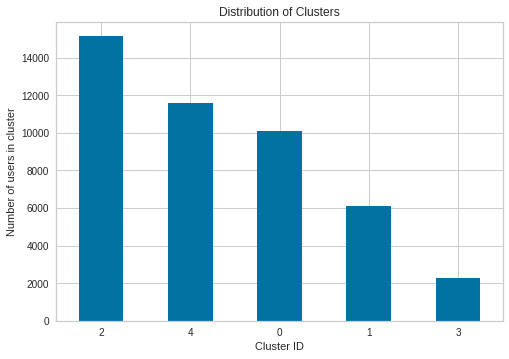

In [12]:
cluster_bar(y_kmeans)

# Filter the data by education and scale it

In [13]:
users_data_reduced = users_data.filter(regex = 'education')
users_data_reduced.head(n = 3)

,education_tertiary,education_secondary,education_Unknown,education_primary
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0


In [14]:
# Standardize the data.

scaler = StandardScaler()
        
scaler.fit(users_data_reduced)
users_data_reduced_scaled = scaler.transform(users_data_reduced)

# Train a hierarchical clustering model

In [15]:
agglom = AgglomerativeClustering(n_clusters = n_clusters,
                                 affinity = 'euclidean',
                                 linkage = 'single')

agglom.fit(users_data_reduced_scaled)
y_agglom = agglom.fit_predict(users_data_reduced_scaled)

results['cluster'] = y_agglom
results.head()

,cluster,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


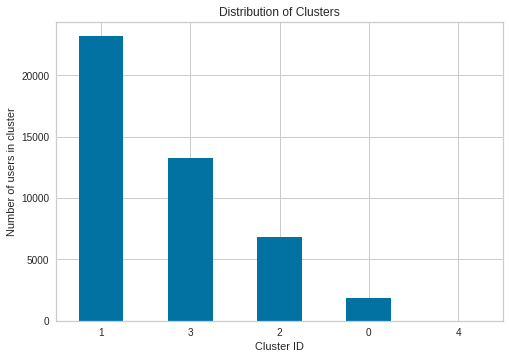

In [16]:
cluster_bar(y_agglom)

# Adjust the number of clusters in the ***k***-means clustering model

In [17]:
n_clusters = 10

kmeans = KMeans(n_clusters = n_clusters, random_state = 10)

kmeans.fit(users_data_scaled)

KMeans(n_clusters=10, random_state=10)

# Examine the results

In [18]:
y_kmeans = kmeans.predict(users_data_scaled)

results['cluster'] = y_kmeans
results.head()

,cluster,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,8,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


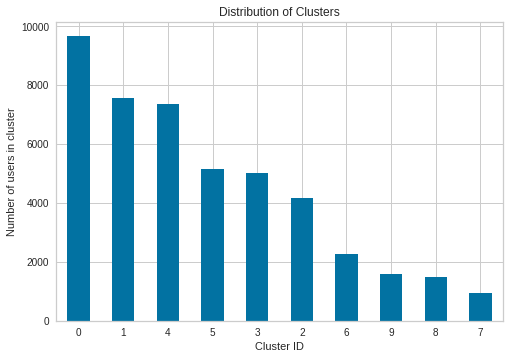

In [19]:
cluster_bar(y_kmeans)

# Load the PCA-reduced demographics data

In [20]:
pca_df = pd.read_pickle('/home/jovyan/work/Clustering/data/users_data_demo_pca.pickle')

pca_df = pd.concat([pca_df, pd.DataFrame(y_kmeans)], axis = 1). \
rename(columns = {0: 'cluster'})

pca_df

,PCA1,PCA2,cluster
0,2.557545,1.079613,0
1,-0.820505,-1.750581,1
2,-0.576607,-0.551404,8
3,-0.541647,1.593626,4
4,0.385598,-0.614768,4
...,...,...,...
45174,1.160485,0.073978,1
45175,-0.660738,4.371075,6
45176,-1.327676,2.367745,6
45177,-1.575612,1.040206,4


# Visualize the clusters on the reduced data

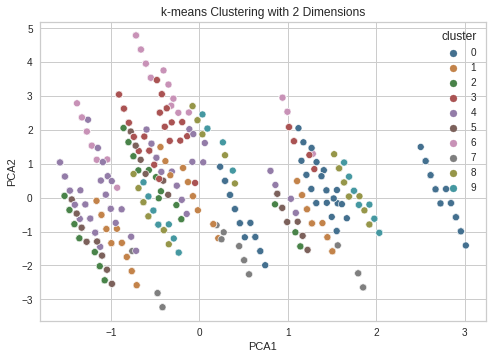

In [21]:
cmap = sns.color_palette('tab10', n_colors = n_clusters, desat = .5)

sns.scatterplot(x = 'PCA1', y = 'PCA2',
                hue = 'cluster', data = pca_df[::25],
                palette = cmap, legend = True)

plt.title('k-means Clustering with 2 Dimensions');

# Use the elbow method to determine the optimal number of clusters

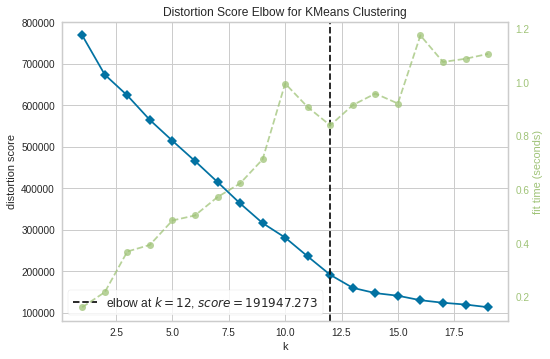

In [22]:
elbow = KElbowVisualizer(kmeans, k = (1, 20))
elbow.fit(users_data_scaled)
elbow.poof();

# Use silhouette analysis to determine the optimal number of clusters

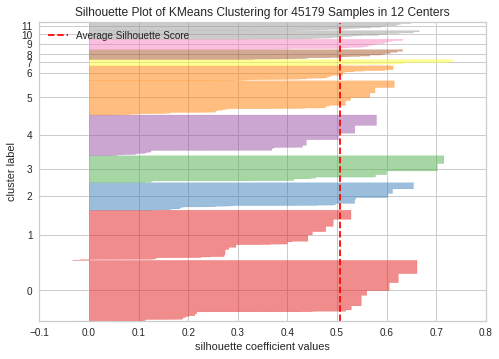

In [23]:
silhouette = SilhouetteVisualizer(KMeans(12, random_state = 10))
silhouette.fit(users_data_scaled)
silhouette.poof();

In [24]:
print('Number of clusters: ', silhouette.n_clusters_)
print('Silhouette score:   ', silhouette.silhouette_score_)

Number of clusters:  12
Silhouette score:    0.5051362485226609


# Try a different number of clusters and compare the silhouette scores

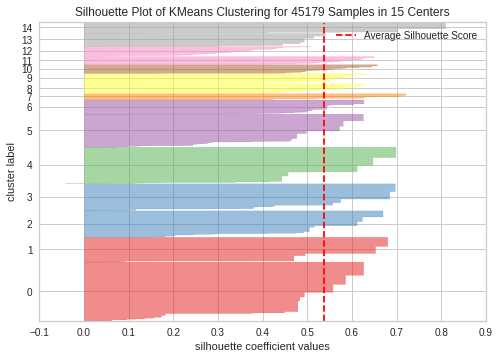

In [25]:
silhouette = SilhouetteVisualizer(KMeans(15, random_state = 10))
silhouette.fit(users_data_scaled)
silhouette.poof();

In [26]:
print('Number of clusters: ', silhouette.n_clusters_)
print('Silhouette score:   ', silhouette.silhouette_score_)

Number of clusters:  15
Silhouette score:    0.537078307535526


# Retrain the ***k***-means model on the optimal number of clusters

In [27]:
n_clusters = 12

kmeans = KMeans(n_clusters = n_clusters, random_state = 10)

kmeans.fit(users_data_scaled)

KMeans(n_clusters=12, random_state=10)

# Generate the clusters and the number of users in each cluster

In [28]:
y_kmeans = kmeans.predict(users_data_scaled)

results['cluster'] = y_kmeans
results.head()

,cluster,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,8,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


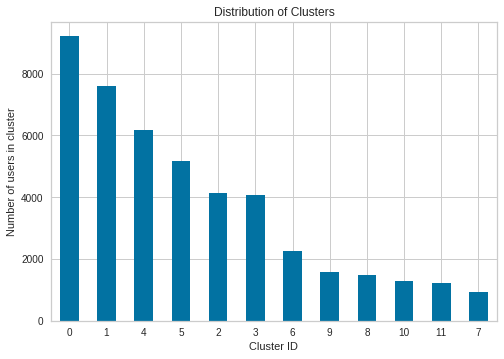

In [29]:
cluster_bar(y_kmeans)

# Compare two different clusters

In [30]:
cluster_6 = results[results.cluster == 6]
cluster_6.describe()

,cluster,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
count,2262.0,2262.0,2262.0,2262.0,2262.0,2262.0,2262.0,2262.0,2262.0,2262.0,2262.0,2262.0,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000
mean,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161362,0.434571,0.052608,0.351459,0.047745,4.229001
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367946,0.495810,0.223300,0.477532,0.213274,0.930437
min,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000
max,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


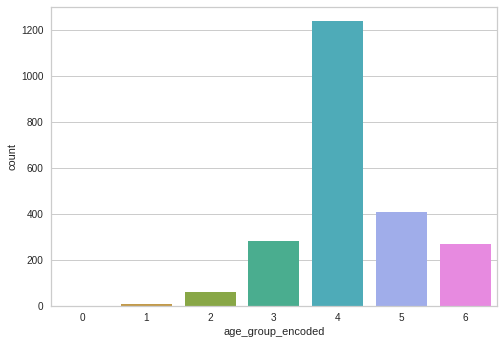

In [31]:
sns.countplot(cluster_6['age_group_encoded']);

In [32]:
cluster_7 = results[results.cluster == 7]
cluster_7.describe()

,cluster,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
count,937.0,937.0,937.0,937.0,937.0,937.0,937.0,937.0,937.0,937.0,937.0,937.0,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.237994,0.542156,0.172892,0.046958,0.935966,0.721451
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.426083,0.498486,0.378356,0.211663,0.244945,0.592239
min,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


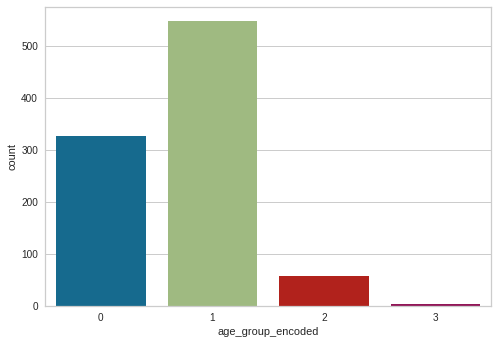

In [33]:
sns.countplot(cluster_7['age_group_encoded']);

# Save the best model

In [34]:
pickle.dump(kmeans, open('kmeans.pickle', 'wb'))